In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully

In [ ]:
# Diccionario de emociones

from tensorflow.keras.utils import to_categorical

n1 = ['angry','disgust','fear','happy','neutral','sad','surprise']
n2 = to_categorical(list(range(len(n1))))
emociones_type1 = {n1[i]:n2[i] for i in range(len(n1))}
emociones_type2 = {str(j):i for i,j in emociones_type1.items()}

In [ ]:
# Cargar los datos procesados

import numpy as np

X = np.load('/content/gdrive/MyDrive/kaggle_faciales/X_tensor.npy')
Y = np.load('/content/gdrive/MyDrive/kaggle_faciales/Y_tensor.npy')

In [ ]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1, 70, 70, 1)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1, random_state=42)

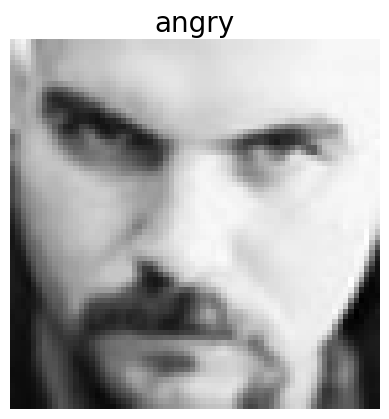

In [ ]:
# Ver ejemplo

import random
import matplotlib.pyplot as plt


ind = random.randint(0, len(X_train)-1)

X_original = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
fig, ax = plt.subplots()
ax.imshow(X_original[ind], cmap='gray')
ax.axis('off')
emotion_label = emociones_type2[str(Y_train[ind])]
ax.set_title(emotion_label, fontsize=20)
plt.show()

In [ ]:
# Arquitectura del modelo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,
                             height_shift_range=0.1,zoom_range=0.1)

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


756/756 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.2335 - loss: 1.8368 - val_accuracy: 0.2597 - val_loss: 1.7802
Epoch 2/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.2575 - loss: 1.7876 - val_accuracy: 0.2648 - val_loss: 1.7407
Epoch 3/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.2647 - loss: 1.7604 - val_accuracy: 0.2804 - val_loss: 1.7179
Epoch 4/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.2726 - loss: 1.7424 - val_accuracy: 0.3023 - val_loss: 1.6792
Epoch 5/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.2873 - loss: 1.7145 - val_accuracy: 0.3325 - val_loss: 1.6552
Epoch 6/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3089 - loss: 1.6813 - val_accuracy: 0.4140 - val_loss: 1.5138
Epoch 7/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3495 - loss: 1.6173 - val_accuracy: 0.4283 - val_loss: 1.4603
Epoch 8/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.3709 - loss: 1.5853 - val_accurac

In [ ]:
# Entrenamiento del modelo, primeras épocas

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=50, validation_data=(X_test, Y_test))

In [ ]:
model.save('/content/gdrive/MyDrive/kaggle_faciales/modelo1_50ep.keras')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/kaggle_faciales/modelo1_50ep.keras')

In [ ]:
# Segundo entrenamiento del modelo, añadiendo más epocas

history = model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=70,
                    initial_epoch = 50, validation_data=(X_test, Y_test))

Epoch 51/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.5173 - loss: 1.2762 - val_accuracy: 0.5538 - val_loss: 1.1583
Epoch 52/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5204 - loss: 1.2660 - val_accuracy: 0.5537 - val_loss: 1.1712
Epoch 53/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5098 - loss: 1.2729 - val_accuracy: 0.5488 - val_loss: 1.1735
Epoch 54/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5254 - loss: 1.2688 - val_accuracy: 0.5559 - val_loss: 1.1638
Epoch 55/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.5199 - loss: 1.2646 - val_accuracy: 0.5664 - val_loss: 1.1456
Epoch 56/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.5188 - loss: 1.2812 - val_accuracy: 0.5699 - val_loss: 1.1512
Epoch 57/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.5199 - loss: 1.2681 - val_accuracy: 0.5544 - val_loss: 1.1567
Epoch 58/70
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.5168 - loss: 1

In [ ]:
model.save('/content/gdrive/MyDrive/kaggle_faciales/modelo1_70ep.keras')

In [ ]:
# Ampliación de la arquitecura del modelo y cambios en el datagen

from tensorflow.keras.layers import BatchNormalization

new_datagen = ImageDataGenerator(rotation_range=45,width_shift_range=0.25,
                             height_shift_range=0.25,zoom_range=0.25,
                             horizontal_flip=True,vertical_flip=True,
                             shear_range=0.2,brightness_range=[0.8, 1.2],
                             channel_shift_range=30.0)
model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar el nuevo modelo

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=90,
                    initial_epoch = 55, validation_data=(X_test, Y_test))

model.save('/content/gdrive/MyDrive/kaggle_faciales/modelo2_90ep.keras')

Epoch 56/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5753 - loss: 1.1344 - val_accuracy: 0.6069 - val_loss: 1.0545
Epoch 57/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5762 - loss: 1.1287 - val_accuracy: 0.5684 - val_loss: 1.1260
Epoch 58/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5730 - loss: 1.1310 - val_accuracy: 0.5803 - val_loss: 1.0878
Epoch 59/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5761 - loss: 1.1228 - val_accuracy: 0.5606 - val_loss: 1.1607
Epoch 60/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5763 - loss: 1.1274 - val_accuracy: 0.6057 - val_loss: 1.0543
Epoch 61/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5815 - loss: 1.1160 - val_accuracy: 0.5986 - val_loss: 1.0650
Epoch 62/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5829 - loss: 1.1123 - val_accuracy: 0.6074 - val_loss: 1.0441
Epoch 63/90
756/756 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5799 - loss: 1

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/kaggle_faciales/modelo2_90ep.keras')

In [ ]:
loss, accuracy = model.evaluate(X_val, Y_val, verbose=1)

print(f"Pérdida en el conjunto de validación: {loss}")
print(f"Precisión en el conjunto de validación: {accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.5758 - loss: 1.1709
Pérdida en el conjunto de validación: 1.1367110013961792
Precisión en el conjunto de validación: 0.579556405544281
